In [6]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
data=pd.read_csv('raisin1.csv')

In [10]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,EducationField
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen,Life Sciences
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen,Life Sciences
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen,Other
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen,Life Sciences
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,Kecimen,Medical
...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Life Sciences
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
 8   EducationField   1470 non-null   object 
dtypes: float64(7), object(2)
memory usage: 103.5+ KB


In [12]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'EducationField'],
      dtype='object')

In [13]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [14]:
data.isnull()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,EducationField
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1465,True,True,True,True,True,True,True,True,False
1466,True,True,True,True,True,True,True,True,False
1467,True,True,True,True,True,True,True,True,False
1468,True,True,True,True,True,True,True,True,False


In [15]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,EducationField
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen,Life Sciences
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen,Life Sciences
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen,Other
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen,Life Sciences
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,Kecimen,Medical


In [16]:
data.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,EducationField
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Life Sciences
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical
1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medical


In [17]:
# target
data.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

### Target is perfectly balanced

In [19]:

# basic stats for numerical features
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

data[features_num].describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


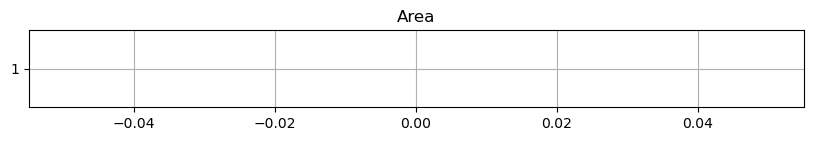

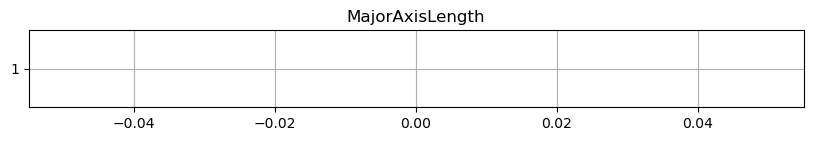

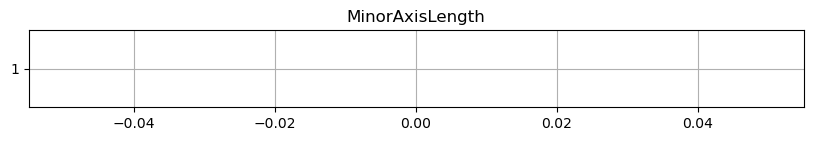

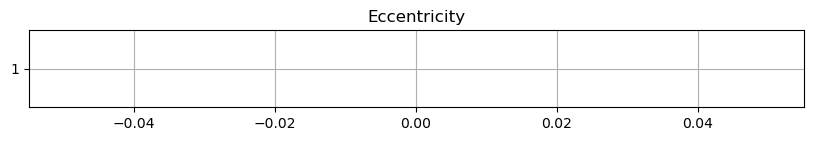

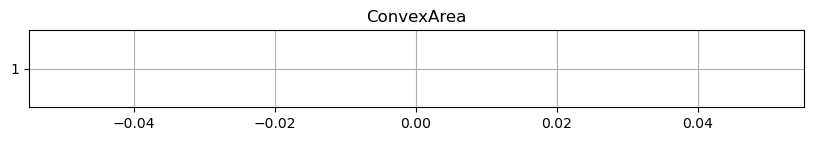

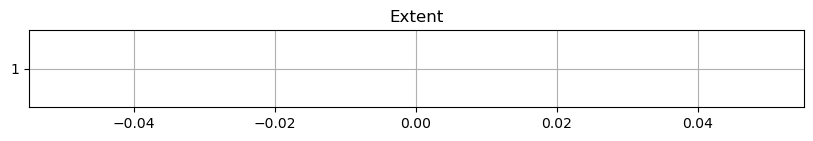

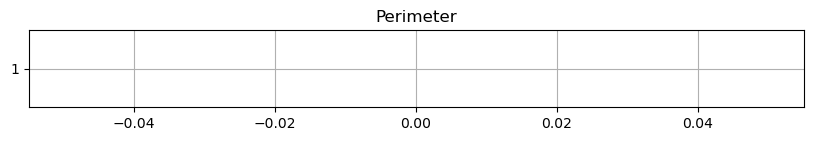

In [20]:
# boxplots of all features
for f in features_num:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=data[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

C:\Users\thomb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


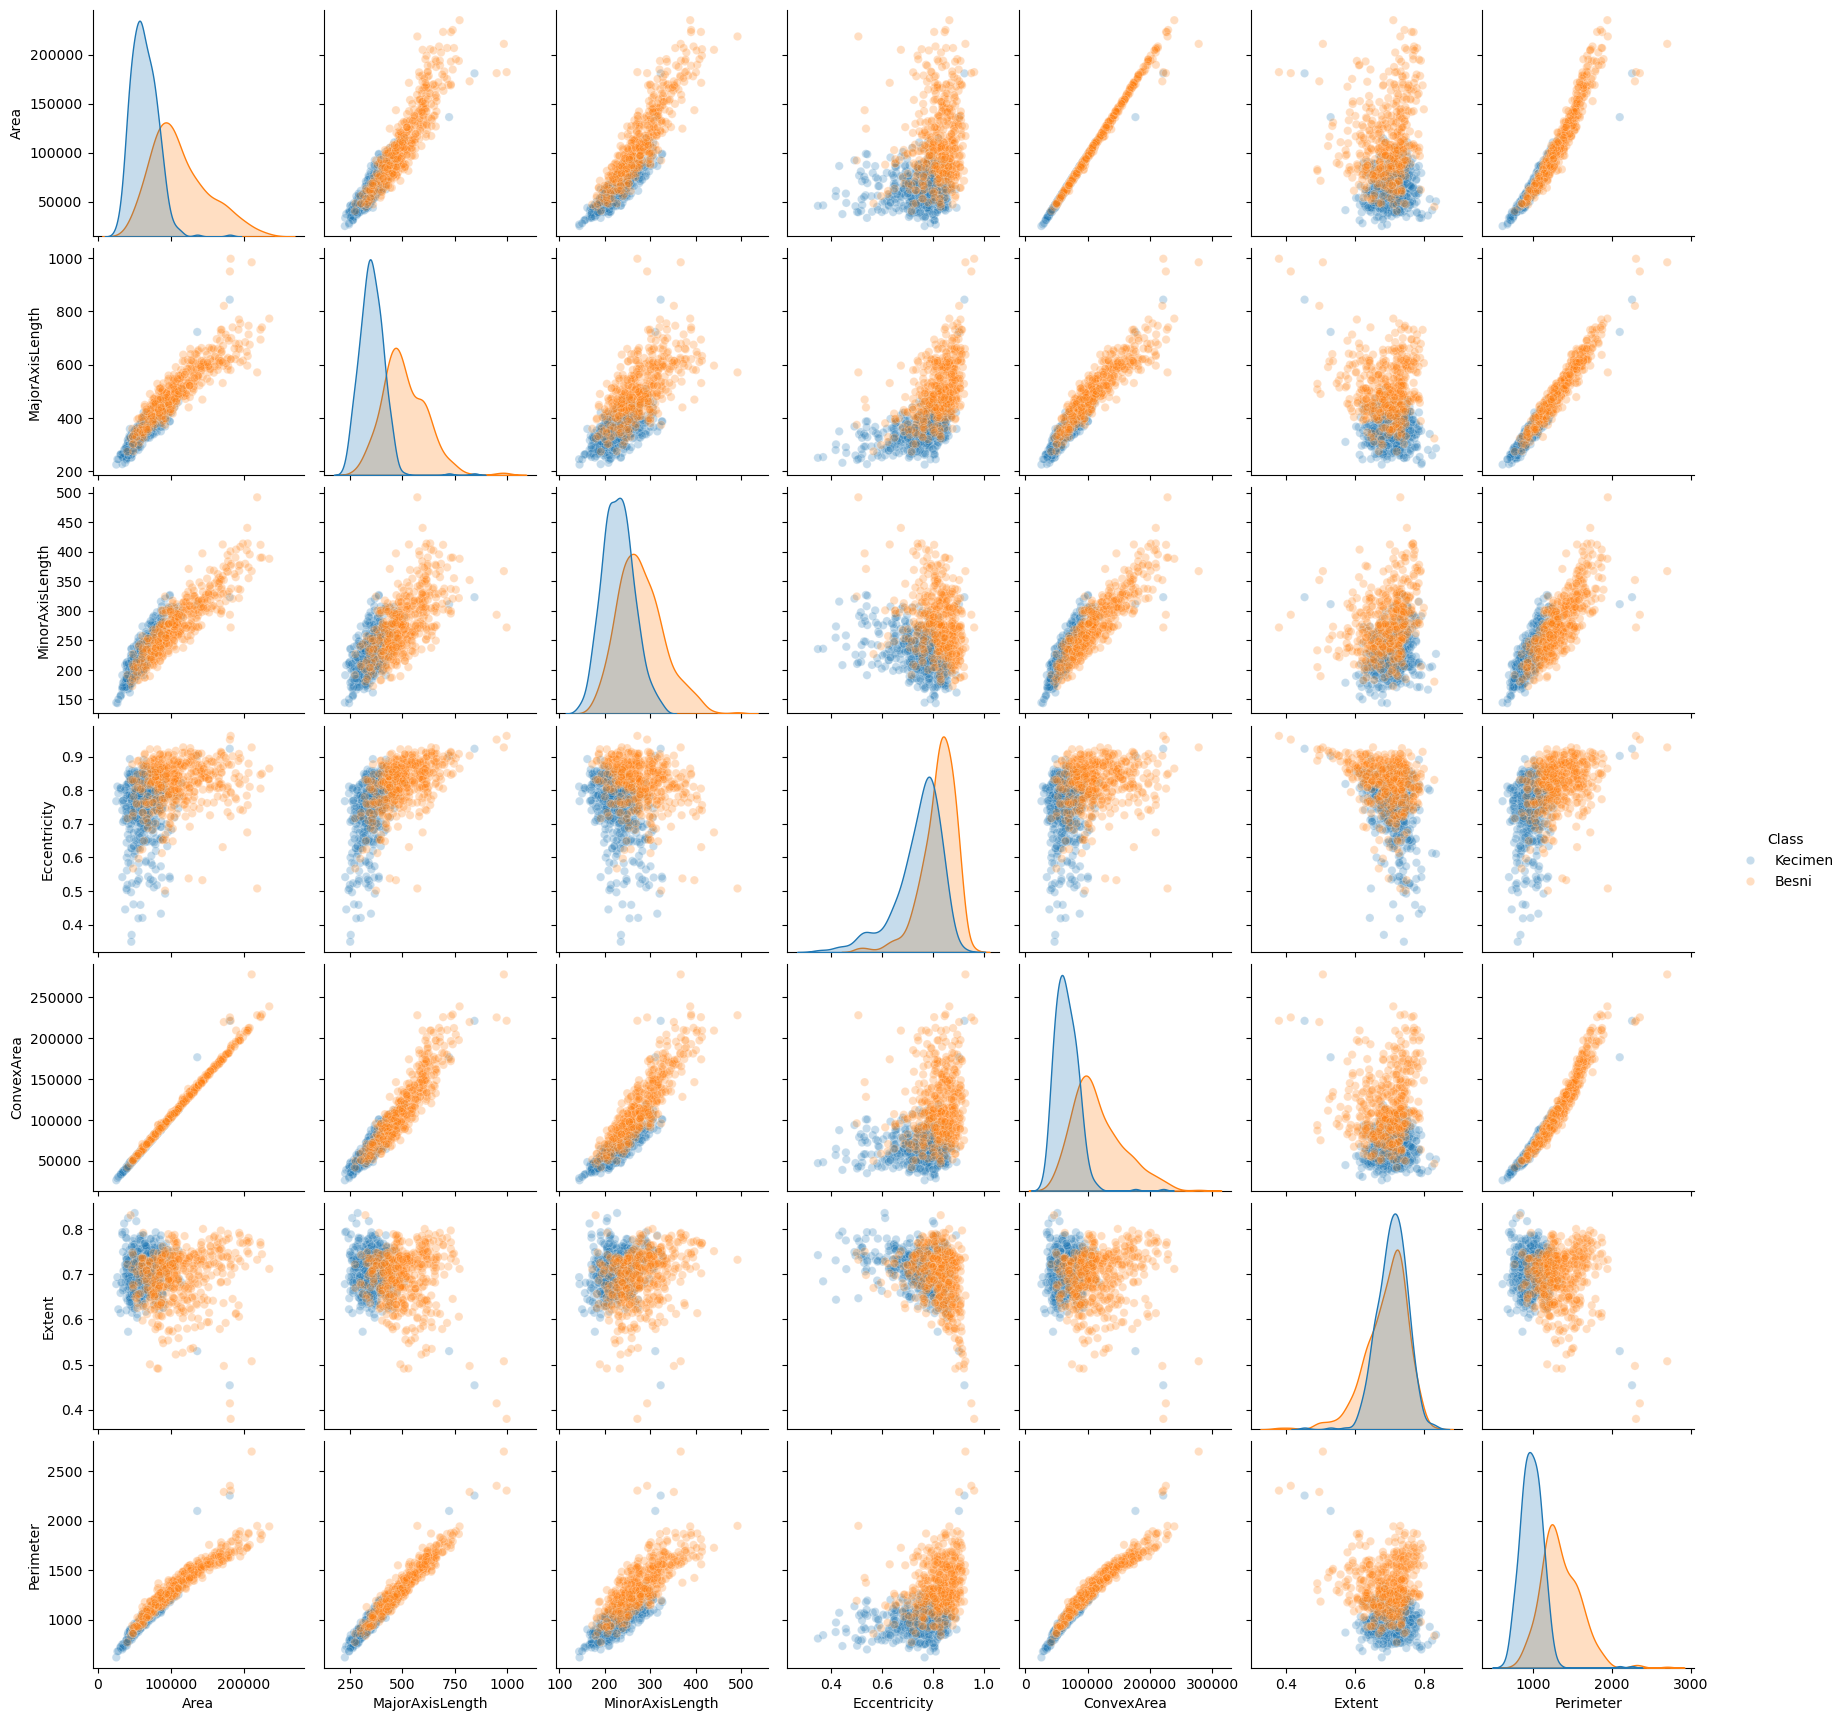

In [21]:
# pairwise scatterplot, representing Class by color
sns.pairplot(data, hue='Class',
             plot_kws = {'alpha' : 0.25})
plt.show()

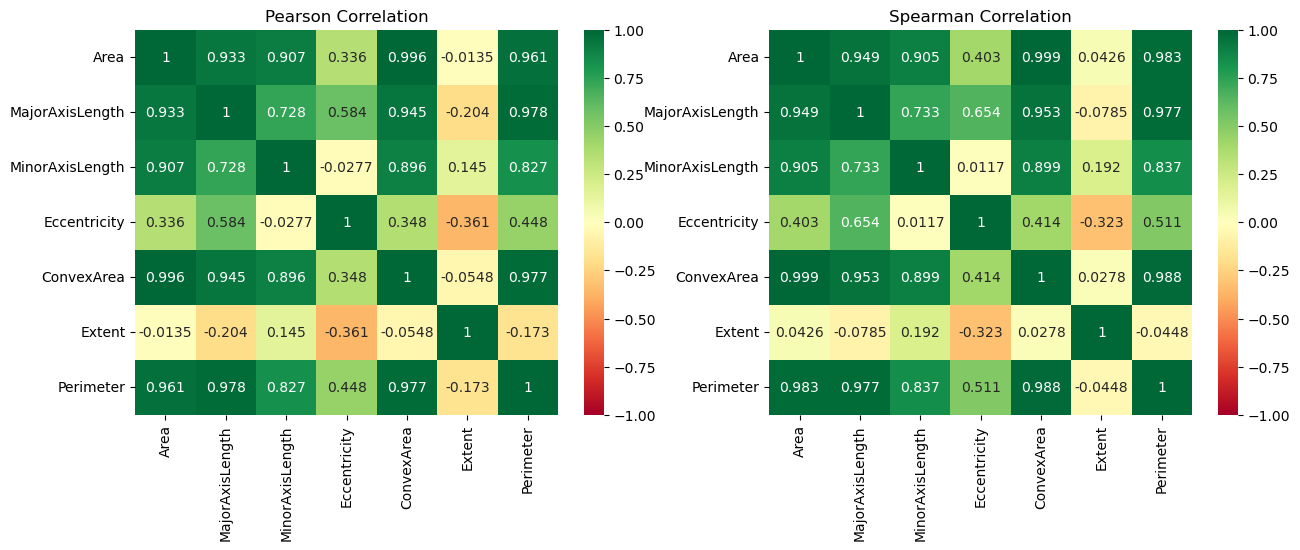

In [22]:
# calc and display correlations
corr_pearson = data[features_num].corr(method='pearson')
corr_spearman = data[features_num].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', 
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

# Feature Ditributions 

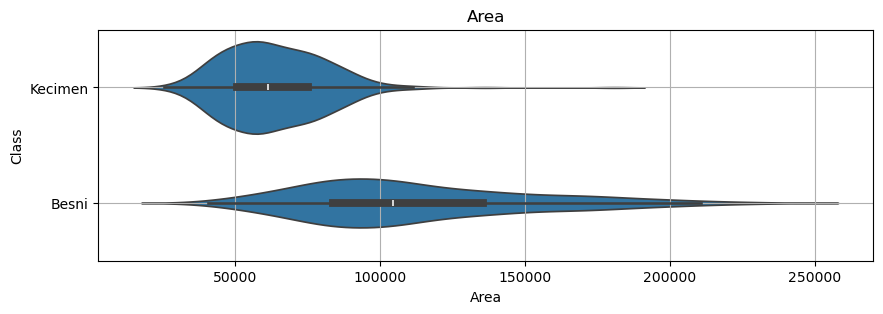

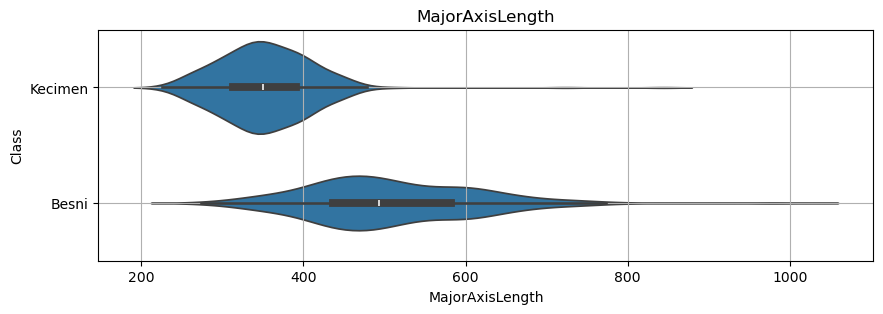

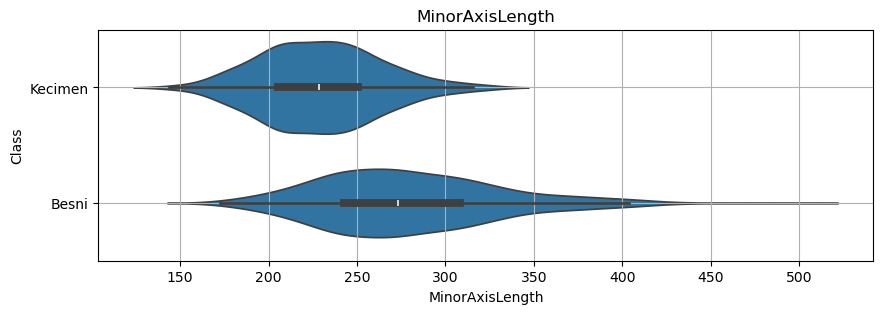

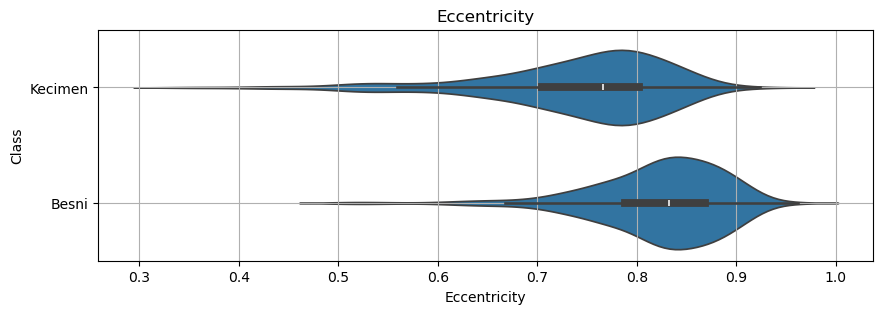

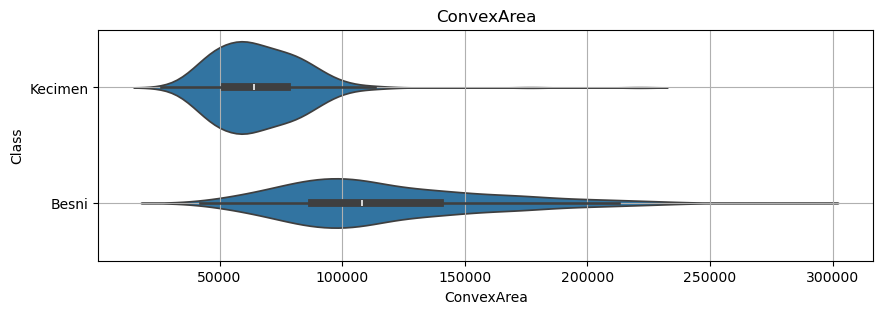

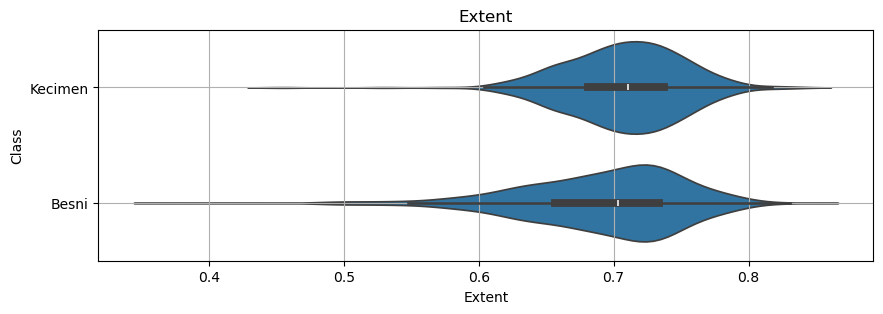

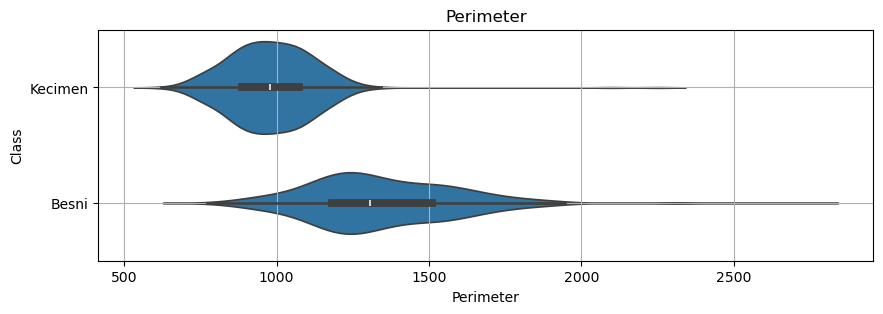

In [23]:
# plot distributions split by class for each feature
for f in features_num:
    plt.figure(figsize=(10,3))
    sns.violinplot(data=data, y='Class', x=f)
    plt.grid()
    plt.title(f)
    plt.show()

# Reduction - PCA 

In [24]:
# standardize features
df4pca_std = StandardScaler().fit_transform(data[features_num])
# run PCA
pc_model = PCA(n_components=3)
pc = pc_model.fit_transform(df4pca_std)
# append PCA components to original data frame
data['pc_1'] = pc[:,0]
data['pc_2'] = pc[:,1]
data['pc_3'] = pc[:,2]

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values